In [135]:
import pandas as pd
import numpy as np
import os
import glob
import cv2
import tifffile as tifi
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import shutil

In [136]:
%cd /Volumes/SEB_USB/Andrea_Thermal_2020/Manual/

/Volumes/SEB_USB/Andrea_Thermal_2020/Manual


In [137]:
selected_lines = pd.read_csv('selected_lines.csv')
selected_lines['plot'] = selected_lines['plot'].astype(str).str.zfill(4)

selected_lines['range'] = selected_lines['plot'].str[0:2]
selected_lines['column'] = selected_lines['plot'].str[2:]

In [140]:
selected_lines[selected_lines['genotype'] == 'PI_678303']

,genotype,plot,range,column
38,PI_678303,0416,04,16
145,PI_678303,4026,40,26


## Removing non-selected files from image directories

In [5]:
selected_lines_list = selected_lines['plot'].to_list()

In [190]:
path = 'plotclip/FLIR-2020-09-11__23-00-48-992-plotclip/plotclip_out/'

In [191]:
#Removes all of the directories not in the list specified

for filename in os.listdir(path):
    #If file is not present in list
    if filename not in selected_lines_list:
        #Get full path of file and remove it
        full_file_path = os.path.join(path, f'{filename}/')
        #shutil.rmtree(full_file_path)

## Only Selecting images of 5 genotypes of interested within the 26

In [41]:
## grabs all of the plots with the accession numbers in the list
goi_accession = ['PI_677994', 'PI_678025', 'PI_678122', 'PI_678337']
goi_plot = selected_lines[selected_lines['genotype'].isin(goi_accession)]

In [58]:
## Creates a list of unique range numbers of all experimental goi
range_list = goi_plot['range'].unique().tolist()
## Goes back to main file and grabs all of the plots with that particular range (this would include all experimental and the border plots in the same range)
selected_lines_border = selected_lines[selected_lines['range'].isin(range_list)]
## list of plots with border
plot_list = selected_lines_border['plot'].to_list()

## Grabbing plot clip images of plots of interest (for one date)

In [66]:
path = 'plotclip/FLIR-2020-08-14__12-28-13-122-plotclip/plotclip_out/'
path_list = []

for file in os.listdir(path):
    if file in plot_list:
        wanted_file_path = os.path.join(path, f'{file}/')
        path_list.append(wanted_file_path)
        path_list.sort()

## Thermal False Coloring

In [127]:
def search_list(POI, path_list):
    path_df = pd.DataFrame(path_list, columns = ['path'])
    path_df['plot'] = path_df['path'].str[-5:-1]
    path_oi = path_df[path_df['plot'].isin([POI])]
    return path_oi

In [134]:
search_list('0301', path_list)

,path,plot
0,plotclip/FLIR-2020-08-14__12-28-13-122-plotcli...,0301


In [141]:
# POI = '0301'
# tif_path = search_list('0301', path_list)['path']
# tif_img = tifi.imread(f'{tif_path}*ortho.tif')
# a_img = cv2.cvtColor(tif_img, cv2.COLOR_GRAY2BGR)
# a_img = cv2.normalize(a_img, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

## Manually Pulling Specific PI Accessions

In [145]:
tif_img_WW = tifi.imread('all_plotclip/PI_678303/2020-08-07/0416_ortho.tif')
a_img_WW = cv2.cvtColor(tif_img_WW, cv2.COLOR_GRAY2BGR)
a_img_WW = cv2.normalize(a_img_WW, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

In [149]:
tif_img_WL = tifi.imread('all_plotclip/PI_678303/2020-08-07/4026_ortho.tif')
a_img_WL = cv2.cvtColor(tif_img_WL, cv2.COLOR_GRAY2BGR)
a_img_WL = cv2.normalize(a_img_WL, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

In [155]:
def get_thermal(date, plot):
    tif_img = tifi.imread(f'all_plotclip/PI_678303/{date}/{plot}_ortho.tif')
    plt.figure()
    plt.imshow(tif_img, cmap = 'seismic')

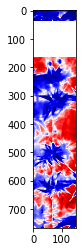

In [160]:
date = '2020-08-21'
plot = '0416'

get_thermal(date, plot)

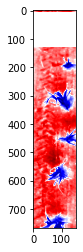

In [161]:
date = '2020-08-21'
plot = '4026'

get_thermal(date, plot)

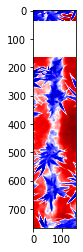

In [162]:
date = '2020-09-11'
plot = '0416'

get_thermal(date, plot)

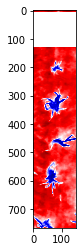

In [163]:
date = '2020-09-11'
plot = '4026'

get_thermal(date, plot)